## Feature Selection

### Feature selection using Genetic Algorithms

In [ ]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population



def fitness_score(population, X_train, Y_train, X_valid, model):
    scores = []
    for chromosome in population:
        model.fit(X_train.iloc[:,chromosome],Y_train)
        predictions = model.predict(X_valid.iloc[:,chromosome])
        scores.append(f1_score(y_valid,predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = np.random.randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen


def generations(df, size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_valid, Y_train, Y_valid):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen, X_train, Y_train, X_valid, LGBMClassifier(random_state=42, n_estimators= 1000))
        print('Best score in generation',i+1,':',scores[:1])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score



In [ ]:
chromo, scores =generations(Xtrain_balanced,size=50,n_feat= Xtrain_balanced.shape[1],n_parents= 25,mutation_rate=0.20,n_gen=4,
                         X_train = Xtrain_balanced ,X_valid = X_valid, Y_train = ytrain_balanced,Y_valid = y_valid)

In [ ]:
scores

[0.8306010928961748, 0.826086956521739, 0.8461538461538461]

In [ ]:
np.array(chromo).astype(int)

array([[1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 0],
       [1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1]])

In [ ]:
chromo, scores =generations(Xtrain_balanced,size=50,n_feat= Xtrain_balanced.shape[1],n_parents= 25,mutation_rate=0.20,n_gen=4,
                         X_train = Xtrain_balanced ,X_valid = X_valid, Y_train = ytrain_balanced,Y_valid = y_valid)

In [ ]:
scores

[0.8494623655913979,
 0.8342245989304813,
 0.8494623655913979,
 0.8324324324324325]

In [ ]:
np.array(chromo).astype(int)

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 1, 1]])

In [ ]:
selected_features = [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 0]

In [ ]:
selected_features = np.array(selected_features).astype(bool)

In [ ]:
Xtrain_balanced_1 = Xtrain_balanced.loc[:, selected_features]
X_valid_1 = X_valid.loc[:, selected_features]

In [ ]:
Xtrain_balanced_1.columns.tolist()

['V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V10',
 'V11',
 'V13',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V25',
 'V26',
 'V27']

In [ ]:
lgbm = LGBMClassifier(random_state=42, n_estimators= 1000)
lgbm.fit(Xtrain_balanced_1, ytrain_balanced)
y_pred_lgbm = lgbm.predict(X_valid_1)
y_pred_lgbm = y_pred_lgbm.astype('int64')

In [ ]:
Accuracy =  accuracy_score(y_valid, y_pred_lgbm),
Pecision =  precision_score(y_valid, y_pred_lgbm),
Recall = recall_score(y_valid, y_pred_lgbm),
F1_Score =  f1_score(y_valid, y_pred_lgbm)

print("Accuracy", Accuracy)
print("Pecision", Pecision)
print("Recall", Recall)
print("F1_Score", F1_Score)

Accuracy (0.9994557775359011,)
Pecision (0.8863636363636364,)
Recall (0.7878787878787878,)
F1_Score 0.8342245989304813


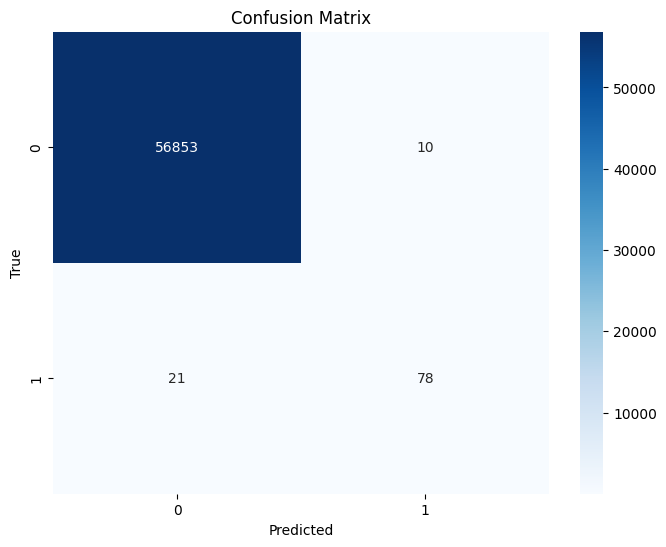

In [ ]:
cm = confusion_matrix(y_valid, y_pred_lgbm)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Feature Selection with Sklearn-genetic

In [ ]:
estimators = LGBMClassifier(random_state=42, n_estimators= 1000, force_col_wise=True)
models = models = GeneticSelectionCV(
    estimators, cv=2, verbose=0,
    scoring="f1", max_features= 10,  # Set max_features to the desired number of features
    n_population=80, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=4,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)


models = models.fit(Xtrain_balanced, ytrain_balanced)


In [ ]:
print('Feature Selection:', Xtrain_balanced.columns[models.support_])

Feature Selection: Index(['Time', 'V1', 'V5', 'V6', 'V11', 'V14', 'V15', 'V17', 'V20', 'V27'], dtype='object')


In [ ]:
selected_features = ['Time', 'V1', 'V5', 'V6', 'V11', 'V14', 'V15', 'V17', 'V20', 'V27']
Xtrain_balanced_2 = Xtrain_balanced[selected_features]
X_valid_2 = X_valid[selected_features]

In [ ]:
lgbm = LGBMClassifier(random_state=42, n_estimators= 1000)
lgbm.fit(Xtrain_balanced_2, ytrain_balanced)
y_pred_lgbm = lgbm.predict(X_valid_2)
y_pred_lgbm = y_pred_lgbm.astype('int64')

[LightGBM] [Info] Number of positive: 170588, number of negative: 170588
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.142950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 341176, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
Accuracy =  accuracy_score(y_valid, y_pred_lgbm),
Pecision =  precision_score(y_valid, y_pred_lgbm),
Recall = recall_score(y_valid, y_pred_lgbm),
F1_Score =  f1_score(y_valid, y_pred_lgbm)

print("Accuracy", Accuracy)
print("Pecision", Pecision)
print("Recall", Recall)
print("F1_Score", F1_Score)

Accuracy (0.9961553316245918,)
Pecision (0.2841726618705036,)
Recall (0.797979797979798,)
F1_Score 0.41909814323607425


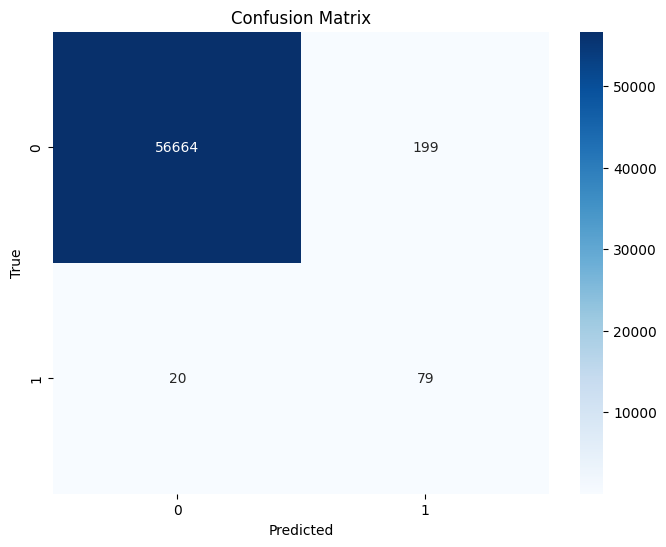

In [ ]:
cm = confusion_matrix(y_valid, y_pred_lgbm)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Automatic Feature selection with FeatureWiz

In [ ]:
from featurewiz import FeatureWiz


Imported 0.3.2 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False, skip_xgboost=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (341176, 31)
#### Single_Label Binary_Classification problem ####
No test data filename 

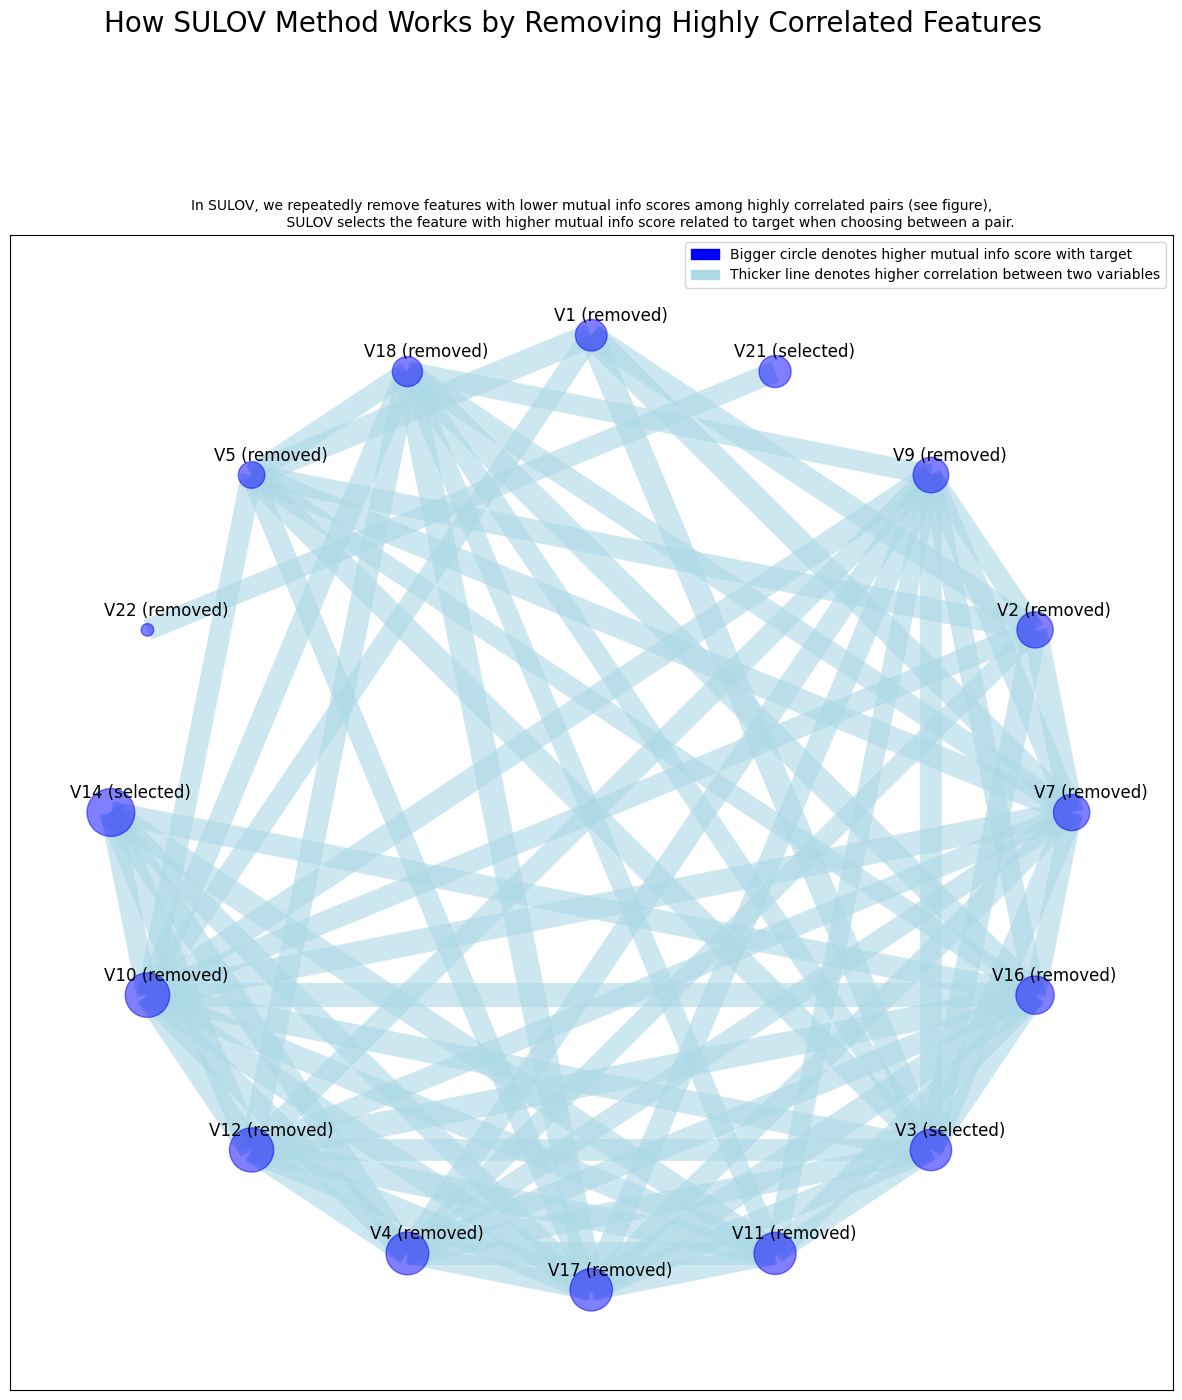

Time taken for SULOV method = 51 seconds
    Adding 0 categorical variables to reduced numeric variables  of 17
Final list of selected 17 vars after SULOV = ['Time', 'V6', 'V8', 'V13', 'V15', 'V19', 'V20', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'V14', 'V3', 'V21']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 7 features per iteration...
    XGBoost version using 1.7.6 as tree method: gpu_hist
    Number of booster rounds = 20
        Selected: ['V14', 'V3', 'Time', 'V13', 'V19', 'V15', 'V21']
            Time taken for regular XGBoost feature selection = 34 seconds
        Selected: ['V14', 'V3', 'V21', 'V13', 'V24', 'V19', 'V15']
            Time taken fo

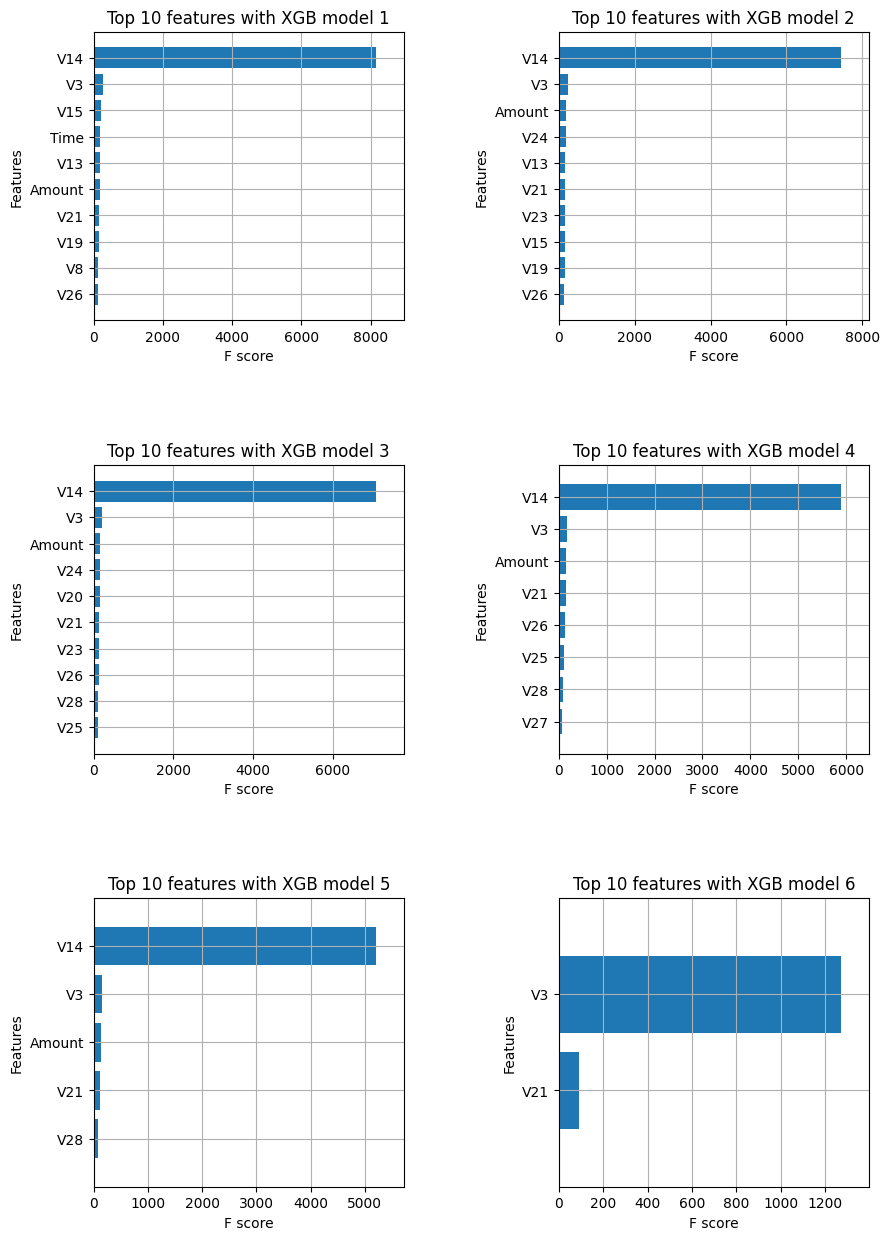

    Completed XGBoost feature selection in 6 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 13 important features:
['V14', 'V3', 'Time', 'V13', 'V19', 'V15', 'V21', 'V24', 'V20', 'Amount', 'V26', 'V25', 'V28']
Total Time taken for featurewiz selection = 174 seconds
Output contains a list of 13 important features and a train dataframe
    Time taken to create entire pipeline = 178 second(s)


['V14',
 'V3',
 'Time',
 'V13',
 'V19',
 'V15',
 'V21',
 'V24',
 'V20',
 'Amount',
 'V26',
 'V25',
 'V28']

In [ ]:
fwiz = FeatureWiz(corr_limit=0.70, feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None, verbose=2)
X_train_selected = fwiz.fit_transform(Xtrain_balanced, ytrain_balanced)
X_test_selected = fwiz.transform(X_valid)
### get list of selected features ###
fwiz.features

In [ ]:
selected_features = ['V14', 'V3', 'Time', 'V13', 'V19', 'V15', 'V21', 'V24', 'V20', 'Amount', 'V26', 'V25', 'V28']
Xtrain_balanced_3 = Xtrain_balanced[selected_features]
X_valid_3 = X_valid[selected_features]

In [ ]:
xgb = XGBClassifier(random_state=42, n_estimators= 1000)
xgb.fit(Xtrain_balanced_3, ytrain_balanced)
y_pred_xgb = xgb.predict(X_valid_3)
y_pred_xgb = y_pred_lgbm.astype('int64')

In [ ]:
Accuracy =  accuracy_score(y_valid, y_pred_xgb ),
Pecision =  precision_score(y_valid, y_pred_xgb ),
Recall = recall_score(y_valid, y_pred_xgb ),
F1_Score =  f1_score(y_valid,y_pred_xgb )

print("Accuracy", Accuracy)
print("Pecision", Pecision)
print("Recall", Recall)
print("F1_Score", F1_Score)

Accuracy (0.9961553316245918,)
Pecision (0.2841726618705036,)
Recall (0.797979797979798,)
F1_Score 0.41909814323607425


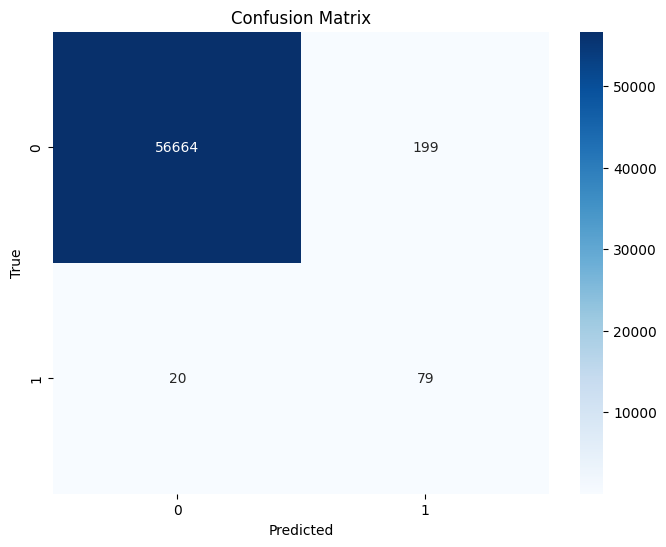

In [ ]:
cm = confusion_matrix(y_valid, y_pred_xgb)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Feature Selection with Recursive Feature Elimination (RFE)

In [ ]:
# Create a LightGBM estimator with 1000 estimators
estimator = lgb.LGBMClassifier(random_state=42, n_estimators=1000)

# Create an RFE model
num_features_to_select = 15  # Number of features you want to retain
rfe = RFE(estimator, n_features_to_select=num_features_to_select)

# Fit the RFE model to your data
rfe.fit(Xtrain_balanced, ytrain_balanced)

# Get the selected features
selected_features = rfe.support_
print("Selected Features:", selected_features)

# Get the ranking of features (higher ranking means more important)
feature_ranking = rfe.ranking_
print("Feature Ranking:", feature_ranking)

In [ ]:
print("Selected Features:", selected_features)

Selected Features: [ True  True  True  True  True False  True False False False  True  True
 False  True  True  True  True  True False  True False False False False
  True False False False False False]


In [ ]:
print("Feature Ranking:", feature_ranking)

Feature Ranking: [ 1  1  1  1  1 14  1  4  6 16  1  1  8  1  1  1  1  1  9  1  2 12  7 15
  1  5 10 13  3 11]


In [ ]:
features_RFE = [ True, True,  True,  True , True, False,  True, False, False, False,  True,  True,
 False , True,  True,  True , True,  True, False,  True, False, False ,False ,False,
  True, False, False, False, False ,False]

Xtrain_balanced_2 = Xtrain_balanced.loc[:, features_RFE]
X_valid_2 = X_valid.loc[:, features_RFE]

In [ ]:
Xtrain_balanced_2.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V6', 'V10', 'V11', 'V13', 'V14', 'V15',
       'V16', 'V17', 'V19', 'V24'],
      dtype='object')

In [ ]:
lgbm = LGBMClassifier(random_state=42, n_estimators= 1000)
lgbm.fit(Xtrain_balanced_2, ytrain_balanced)
y_pred_lgbm = lgbm.predict(X_valid_2)
y_pred_lgbm = y_pred_lgbm.astype('int64')

In [ ]:
Accuracy =  accuracy_score(y_valid, y_pred_lgbm),
Pecision =  precision_score(y_valid, y_pred_lgbm),
Recall = recall_score(y_valid, y_pred_lgbm),
F1_Score =  f1_score(y_valid, y_pred_lgbm)

print("Accuracy", Accuracy)
print("Pecision", Pecision)
print("Recall", Recall)
print("F1_Score", F1_Score)

Accuracy (0.9992275552122467,)
Pecision (0.7894736842105263,)
Recall (0.7575757575757576,)
F1_Score 0.7731958762886598


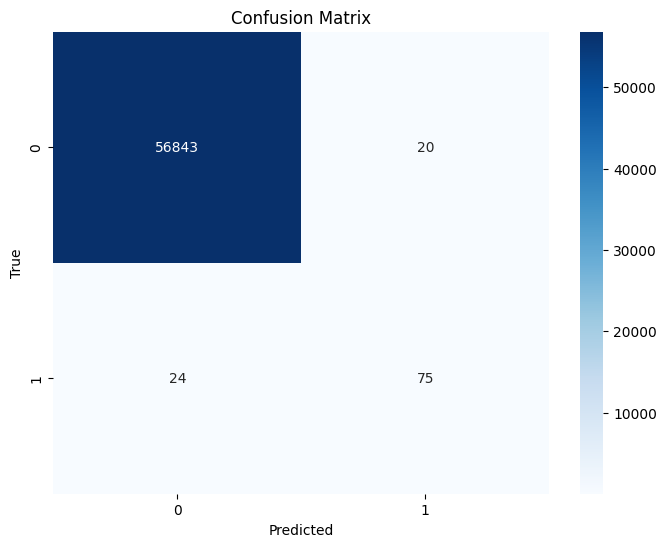

In [ ]:
cm = confusion_matrix(y_valid, y_pred_lgbm)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Feature selection with recursive feature elimination with cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer, f1_score
import lightgbm as lgb

# Create the LightGBM classifier
estimator = lgb.LGBMClassifier(random_state=42, n_estimators=1000)

# Create a StratifiedKFold cross-validation object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a custom scoring function using f1_score
scorer = make_scorer(f1_score)

# Create an RFECV model with custom scoring
rfe = RFECV(estimator, step=3, cv=cv, scoring=scorer)

# Fit the RFECV model to the data
rfe.fit(Xtrain_balanced, ytrain_balanced)

# Get the selected features
selected_features = rfe.support_
print("Selected Features:", selected_features)

# Get the ranking of features (higher ranking means more important)
feature_ranking = rfe.ranking_
print("Feature Ranking:", feature_ranking)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
Selected_Features = [ True,  True,  True,  True,  True,  True , True,  True,  True, False , True,  True,
  True , True , True,  True , True , True , True , True , True , True , True ,False,
  True , True , True ,False , True , True]

Xtrain_balanced_3  = Xtrain_balanced.loc[:, Selected_Features]
X_valid_3 = X_valid.loc[:, Selected_Features]

In [ ]:
Xtrain_balanced_3.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V24', 'V25', 'V26', 'V28', 'Amount'],
      dtype='object')

In [ ]:
lgbm = LGBMClassifier(random_state=42, n_estimators= 1000)
lgbm.fit(Xtrain_balanced_3, ytrain_balanced)
y_pred_lgbm = lgbm.predict(X_valid_3)
y_pred_lgbm = y_pred_lgbm.astype('int64')

In [ ]:
Accuracy =  accuracy_score(y_valid, y_pred_lgbm),
Pecision =  precision_score(y_valid, y_pred_lgbm),
Recall = recall_score(y_valid, y_pred_lgbm),
F1_Score =  f1_score(y_valid, y_pred_lgbm)

print("Accuracy", Accuracy)
print("Pecision", Pecision)
print("Recall", Recall)
print("F1_Score", F1_Score)

Accuracy (0.9994382219725431,)
Pecision (0.8941176470588236,)
Recall (0.7676767676767676,)
F1_Score 0.826086956521739


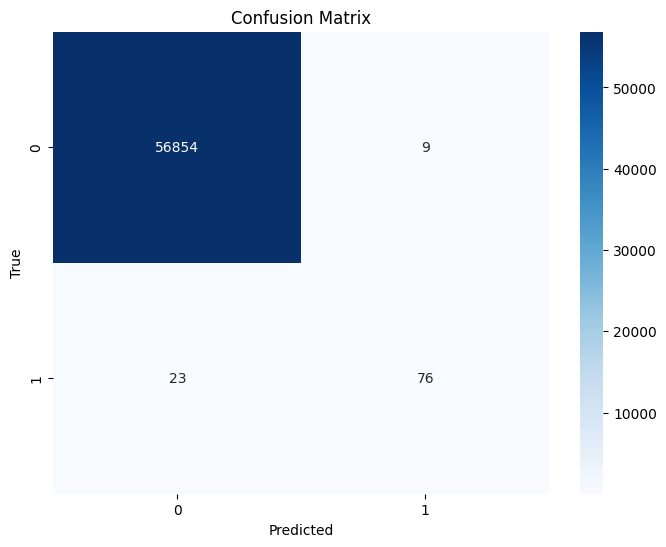

In [ ]:
cm = confusion_matrix(y_valid, y_pred_lgbm)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## SHapely Additive Explanations

In [ ]:
lgbm = LGBMClassifier(random_state=42, n_estimators= 1000)
lgbm.fit(Xtrain_balanced, ytrain_balanced)
y_pred_lgbm = lgbm.predict(X_valid)
y_pred_lgbm = y_pred_lgbm.astype('int64')

In [ ]:
explainer = shap.Explainer(lgbm)
shap_values = explainer.shap_values(X_valid)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


## Sammary plot

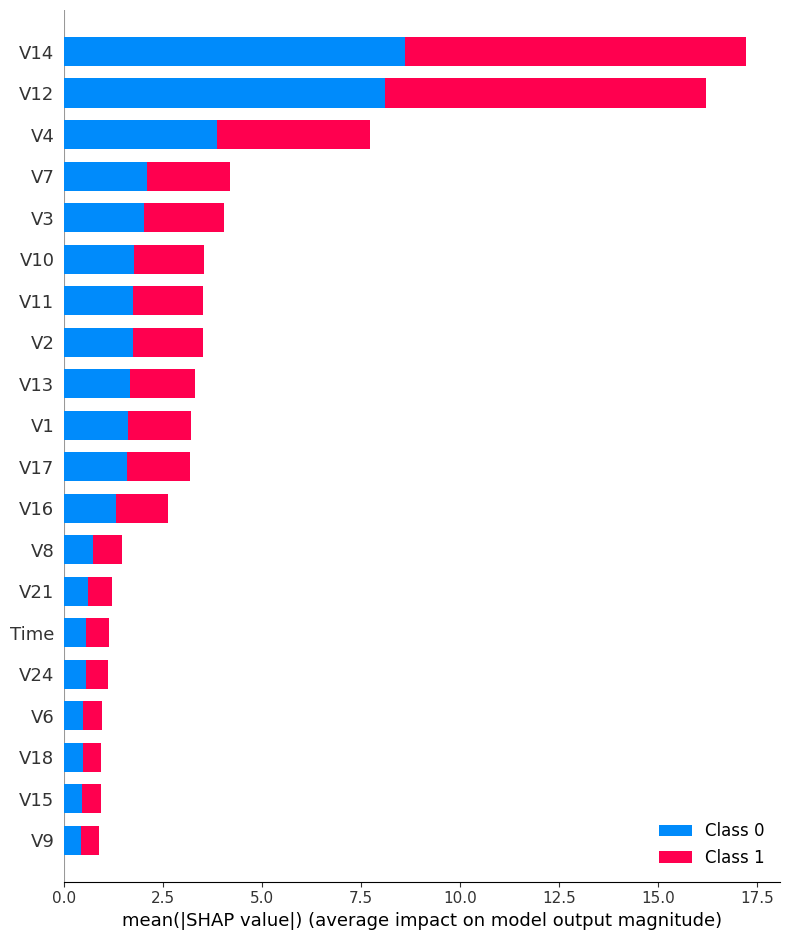

In [ ]:
shap.summary_plot(shap_values, X_valid)

## Dependance Plot

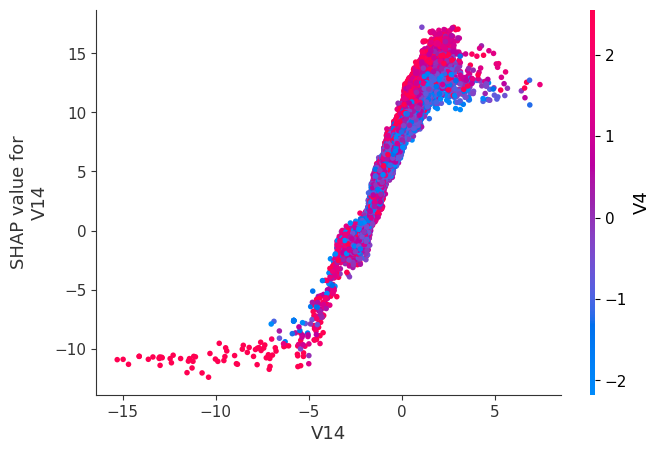

In [ ]:
shap.dependence_plot('V14', shap_values[0], X_valid)

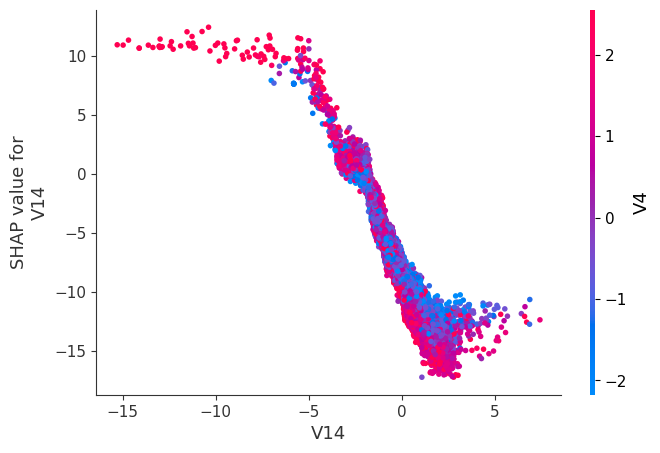

In [ ]:
shap.dependence_plot('V14', shap_values[1], X_valid, show=False)

## Sammary plots for both classes

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


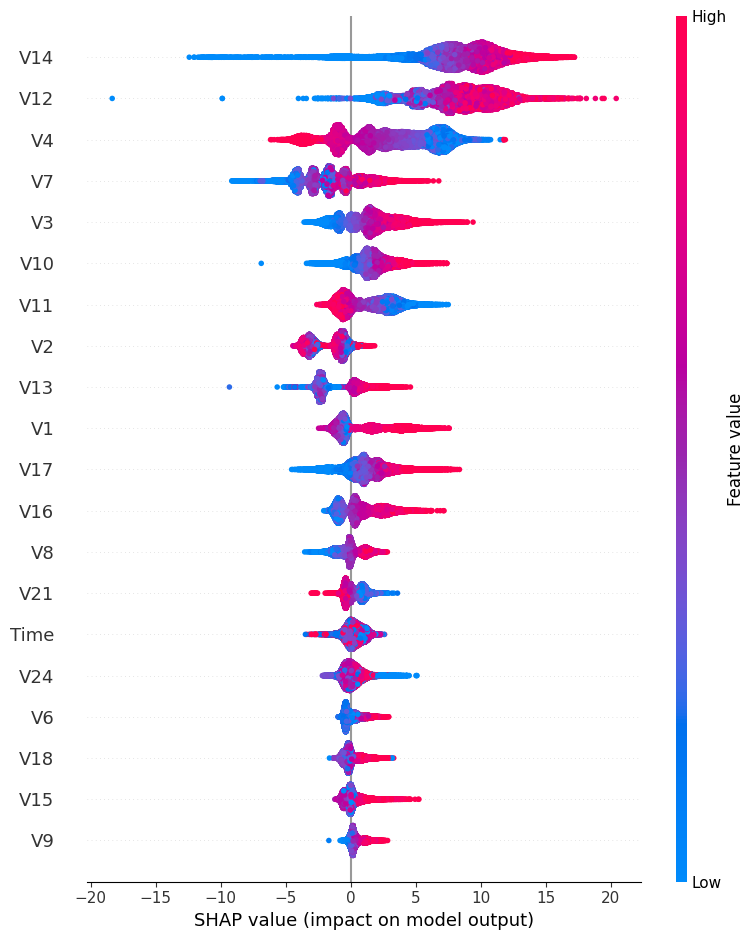

In [ ]:
shap.summary_plot(shap_values[0], X_valid)

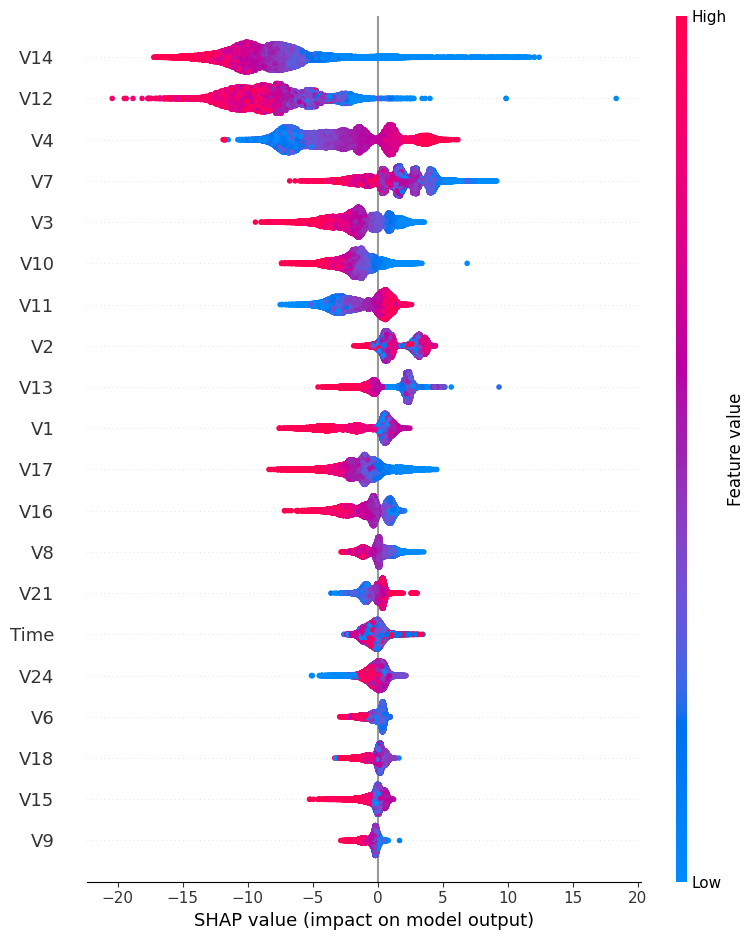

In [ ]:
shap.summary_plot(shap_values[1], X_valid)

## Decision Tree plot

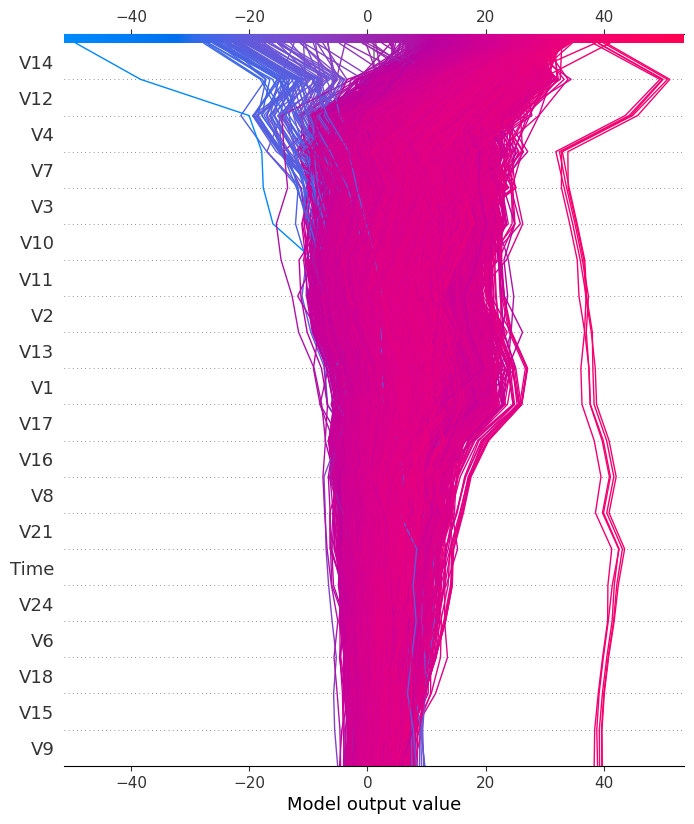

In [ ]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_valid.columns,  ignore_warnings=True)